# DESAFIO 2. Datos de Billboard

## Paso 3. Visualizar los datos

Usando la herramienta de plotting de tu elección, generá visualizaciones que permitan seguir profundizando en el análisis exploratorio de tus datos. No hay un máximo o mínimo de gráficos. Lo que sí es requisito es que haya una lógica y un sentido en la generación de los mismos: tiene que generarse una "historia" clara a partir de los mismos. También deberías en este punto realizar un análisis preliminar de los datos: forma de la distribución, estadísticos y relaciones entre las variables

Se procederá a mostrar la cantidad de canciones por filas:

In [1]:
# Importar librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Cargamos la base

wide = pd.read_csv('df2.2.1.csv', encoding = 'utf8')
long = pd.read_csv('df2.2.2.csv', encoding = 'utf8')

Se creará algunas variables nuevas que serán utilizadas para la graficación:

* Se creará la variable **mejor posición** y la **peor posición**: la cual nos servirá para ordenar los temas.

In [2]:
# Se armará la variable mejor posición
good = long[['cancion','nombre_artistico','ranking']][(long['ranking'] != 0)].sort_values(by=['ranking']).drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)
good.rename(columns={'ranking':'mejor_pos'}, inplace=True)
df_good = pd.merge(long, good, on=['cancion','nombre_artistico'], how='outer')

bad = long[['cancion','nombre_artistico','ranking']][(long['ranking'] != 0)].sort_values(by=['ranking'],ascending=False).drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False)
bad.rename(columns={'ranking':'peor_pos'}, inplace=True)
df = pd.merge(df_good, bad, on=['cancion','nombre_artistico'], how='outer')

* Se creará la variable **permanencia**, que indicará la cantidad de semanas, sin importar los baches y una variable **sem_pos** que me indique la cantidad de semanas con dato.

In [3]:
# Creo la variable permanencia
df['permanencia'] = df[(df['ranking'] != 0)].groupby(['cancion','nombre_artistico'])['num_semana'].transform('max')

# A los NaN de la variable permanencia la transformo en 0.
df['permanencia'].fillna(0, inplace=True)

# Transformo a la variable permenencia como un entero.
df['permanencia'] = df['permanencia'].astype(np.int64)

######################################################
######################################################

# Creo la variable de semanas de permanencia
df['sem_pos'] = df[(df['ranking'] != 0)].groupby(['cancion','nombre_artistico'])['num_semana'].transform('count')

# A los NaN de la variable permanencia la transformo en 0.
df['sem_pos'].fillna(0, inplace=True)

# Transformo a la variable permenencia como un entero.
df['sem_pos'] = df['sem_pos'].astype(np.int64)

** *VISUALIZACIÓN* **

La mayoría de los gráficos que se presentará es analizar las características que existen en Billboard con la variable ranking y la variable semana en posición.

Se analizará canción por canción su derrotero por el ranking, de cada base, según su máximo nivel de posición y por tiempo.

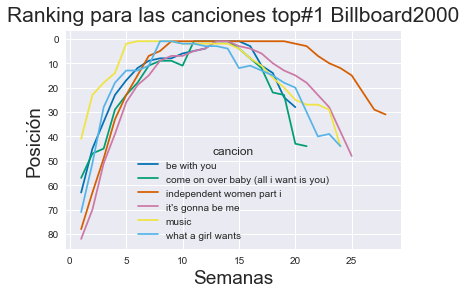

In [4]:
# Vamos a transformar el tiempo en una variable float y trataremos de organizar en base a dicha variable.
df['time'] = pd.to_numeric(df['tiempo'].str.replace(':', '.', case=False)
                     .str.strip(), errors='coerse').values

data = df[(df['mejor_pos']<2) & (df['ranking']>0) & (df['time']<3.5)]

# Establecemos tamaño de la figura
#plt.figure(figsize=(20,8))

# Tomo estilos de Seaborn
sns.set(style="darkgrid", palette="colorblind", color_codes=True);  

plot = data.pivot_table('ranking', index='num_semana', columns='cancion').plot()

# Agregamos el título.
plot.set_title('Ranking para las canciones top#1 Billboard2000', fontdict = {'fontsize': 21, 'verticalalignment':'bottom'} )

# Ajustamos el eje de manera inversa
plt.gca().invert_yaxis()

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Semanas',      fontdict = {'fontsize':19})
plot.set_ylabel('Posición', fontdict = {'fontsize':19});

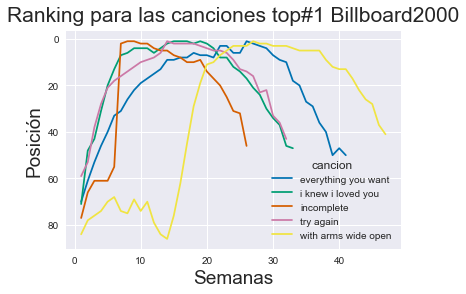

In [5]:
# Vamos a transformar el tiempo en una variable float y trataremos de organizar en base a dicha variable.
df['time'] = pd.to_numeric(df['tiempo'].str.replace(':', '.', case=False)
                     .str.strip(), errors='coerse').values

data = df[(df['mejor_pos']<2) & (df['ranking']>0) & (df['time']>3.49) & (df['time']<4.1)]

# Establecemos tamaño de la figura
#plt.figure(figsize=(20,8))

# Tomo estilos de Seaborn
sns.set(style="darkgrid", palette="colorblind", color_codes=True);  

plot = data.pivot_table('ranking', index='num_semana', columns='cancion').plot()

# Agregamos el título.
plot.set_title('Ranking para las canciones top#1 Billboard2000', fontdict = {'fontsize': 21, 'verticalalignment':'bottom'} )

# Ajustamos el eje de manera inversa
plt.gca().invert_yaxis()

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Semanas',      fontdict = {'fontsize':19})
plot.set_ylabel('Posición', fontdict = {'fontsize':19});

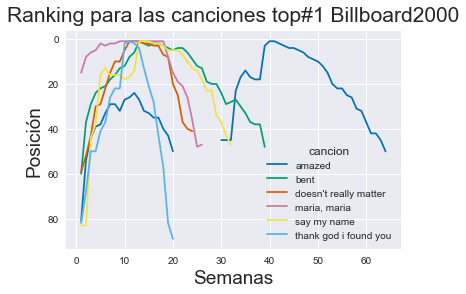

In [6]:
# Vamos a transformar el tiempo en una variable float y trataremos de organizar en base a dicha variable.
df['time'] = pd.to_numeric(df['tiempo'].str.replace(':', '.', case=False)
                     .str.strip(), errors='coerse').values

data = df[(df['mejor_pos']<2) & (df['ranking']>0) & (df['time']>4.09)]

# Establecemos tamaño de la figura
#plt.figure(figsize=(20,8))

# Tomo estilos de Seaborn
sns.set(style="darkgrid", palette="colorblind", color_codes=True);  

plot = data.pivot_table('ranking', index='num_semana', columns='cancion').plot()

# Agregamos el título.
plot.set_title('Ranking para las canciones top#1 Billboard2000', fontdict = {'fontsize': 21, 'verticalalignment':'bottom'} )

# Ajustamos el eje de manera inversa
plt.gca().invert_yaxis()

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Semanas',      fontdict = {'fontsize':19})
plot.set_ylabel('Posición', fontdict = {'fontsize':19});

Se creará cuatro tipos de bases.  Una de las canciones que llegaron a estar en el TOP 5, otra de las que estan en un BAD TOP 5, una con las canciones que estuvieron rankeadas por lo menos 39 semanas y otra que no superaron las 2 semanas.

In [7]:
good_top5 = df[(df['mejor_pos']<6) & (df['ranking'] != 0)].drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False).reset_index(drop=True)    # TOP 5
bad_top5 = df[(df['mejor_pos']>94) & (df['ranking'] != 0)].drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False).reset_index(drop=True)       # BAD TOP 5
mas_escuchadas = df[(df['sem_pos']>38) & (df['ranking'] != 0)].drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False).reset_index(drop=True)   # Más de 39 semanas en Billboard
menos_escuchadas = df[(df['sem_pos']<3) & (df['ranking'] != 0)].drop_duplicates(['cancion','nombre_artistico'],keep='first', inplace=False).reset_index(drop=True)    # Menos de 2 semanas en Billboard

In [8]:
cond_mejores = (good_top5['mejor_pos']<6) & (df['ranking'] != 0)
df['sentencia'] = 0


In [9]:
df['sentencia'][cond_mejores] = 'bueno'
df['sentencia'][~cond_mejores] = 'malo'

/Users/hernangoldenberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hernangoldenberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
df.sentencia.unique()

array(['bueno', 'malo'], dtype=object)

In [12]:
good_top5

cancion             nombre_artistico tiempo  \
0                independent women part i              destiny's child   3:38   
1                            maria, maria                      santana   4:18   
2                      i knew i loved you                savage garden   4:07   
3                                   music                      madonna   3:45   
4   come on over baby (all i want is you)           christina aguilera   3:38   
5                   doesn't really matter                        janet   4:17   
6                             say my name              destiny's child   4:31   
7                             be with you             enrique iglesias   3:36   
8                              incomplete                        sisqo   3:52   
9                                  amazed                     lonestar   4:25   
10                       it's gonna be me                       n'sync   3:10   
11                      what a girl wants           christina aguilera   3:18   
12                    everything you want             vertical horizon   4:01   
13                    with arms wide open                        creed   3:52   
14                              try again                      aaliyah   4:03   
15                                   bent              matchbox twenty   4:12   
16                  thank god i found you                 mariah carey   4:14   
17                                breathe                   faith hill   4:04   
18      case of the ex (whatcha gonna do)                          mya   3:50   
19                         he loves u not                        dream   3:43   
20                   he wasn't man enough                 toni braxton   4:21   
21                         you sang to me                 marc anthony   3:50   
22     give me just one night (una noche)                   98 degrees   3:24   
23                        jumpin' jumpin'              destiny's child   3:48   
24                             kryptonite                 3 doors down   3:53   
25                             thong song                        sisqo   4:05   
26                          i turn to you           christina aguilera   4:00   
27                   my love is your love              whitney houston   4:16   
28                           i wanna know                          joe   4:57   
29                       get it on tonite               montell jordan   4:34   
30                            bye bye bye                       n'sync   3:15   
31                    the real slim shady                       eminem   4:42   
32                             most girls                         pink   4:06   
33                         gotta tell you               samantha mumba   3:19   
34                     bring it all to me                       blaque   3:46   
35                               hot boyz  missy "misdemeanor" elliott   3:51   
36                                  i try                    macy gray   3:52   
37                     this i promise you                       n'sync   4:23   
38                                no more                    ruff endz   3:56   

     genero fecha_entrada fecha_punto_maximo  ranking  num_semana  mejor_pos  \
0      rock    2000-09-23         2000-11-18       78           1          1   
1      rock    2000-02-12         2000-04-08       15           1          1   
2      rock    1999-10-23         2000-01-29       71           1          1   
3      rock    2000-08-12         2000-09-16       41           1          1   
4      rock    2000-08-05         2000-10-14       57           1          1   
5      rock    2000-06-17         2000-08-26       59           1          1   
6      rock    1999-12-25         2000-03-18       83           1          1   
7     latin    2000-04-01         2000-06-24       63           1          1   
8      rock    2000-06-24         2000-08-12       77           1        

* ¿Tiene que ver el artísta para estar en una mejor posición en el ranking?

In [13]:
good_data = good_top5[['cancion','nombre_artistico','mejor_pos','peor_pos']]

data = pd.melt(good_data, id_vars=['cancion','nombre_artistico'],
                 var_name='posicion', value_name='ranking')
data.head()

cancion    nombre_artistico   posicion  \
0               independent women part i     destiny's child  mejor_pos   
1                           maria, maria             santana  mejor_pos   
2                     i knew i loved you       savage garden  mejor_pos   
3                                  music             madonna  mejor_pos   
4  come on over baby (all i want is you)  christina aguilera  mejor_pos   

   ranking  
0        1  
1        1  
2        1  
3        1  
4        1

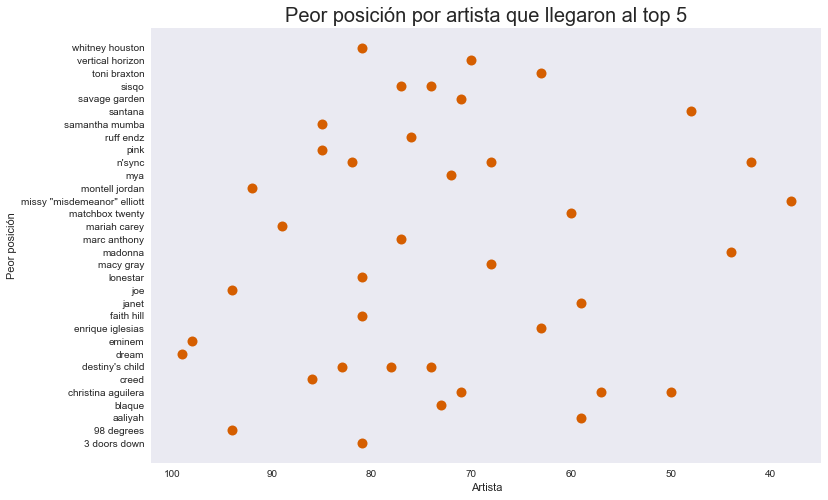

In [14]:
# Establecemos tamaño de la figura
plt.figure(figsize = (12, 8))
plt.grid()

# Aumentamos el tamaño de los puntos
plt.plot(good_top5['peor_pos'], good_top5['nombre_artistico'], 'or', markersize=10)

# Nombre eje x
plt.xlabel("Artista")

# Nombre eje y
plt.ylabel("Peor posición")

# Ajustamos el eje de manera inversa
plt.gca().invert_xaxis()
    
# Título del gráfico
plt.title("Peor posición por artista que llegaron al top 5", fontsize=20);

Se analizará tanto la semanas con posición como el ranking **según género**.

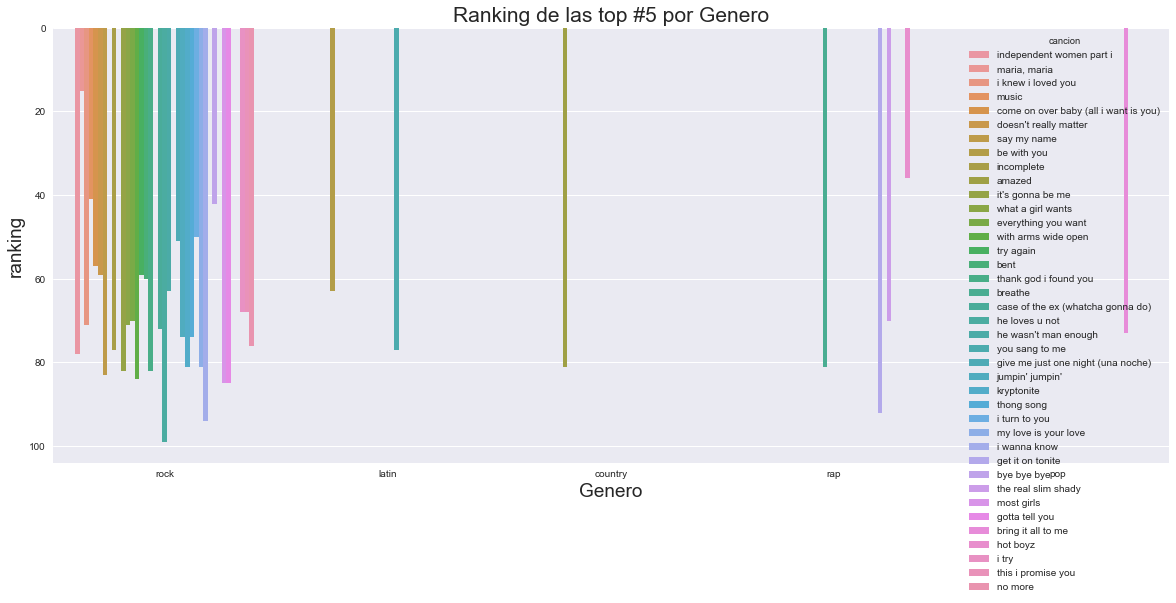

In [15]:
# Establecemos el tamaño de la figura

plt.figure(figsize=(20,8))

# Inicializamos el gráfico
plot = sns.barplot(x = 'genero', y = 'ranking', hue = 'cancion',  data = good_top5, ci=None);

# Agregamos el título.
plot.set_title('Ranking de las top #5 por Genero', fontdict = {'fontsize': 21, 'verticalalignment':'baseline'} )

# Ajustamos el eje de manera inversa
plt.gca().invert_yaxis()

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Genero',      fontdict = {'fontsize':19})
plot.set_ylabel('ranking', fontdict = {'fontsize':19})

# Mostramos el gráfico
plt.show()

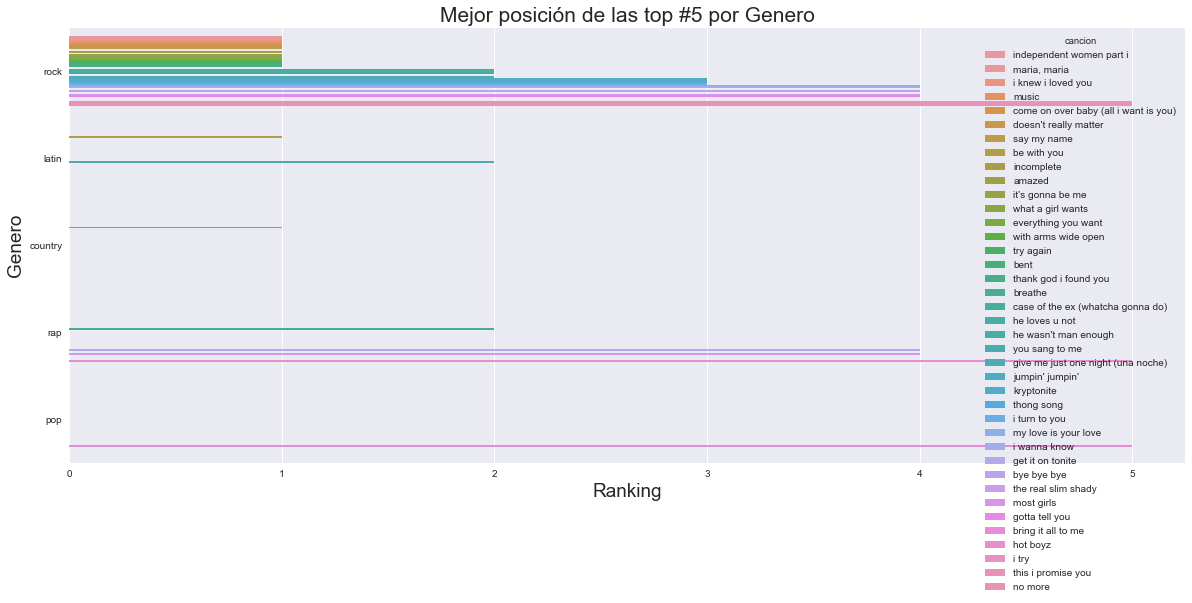

In [16]:
# Establecemos el tamaño de la figura

plt.figure(figsize=(20,8))

# Inicializamos el gráfico
plot = sns.barplot(x = 'mejor_pos', y = 'genero', hue = 'cancion',  data = good_top5, ci=None);

# Agregamos el título.
plot.set_title('Mejor posición de las top #5 por Genero', fontdict = {'fontsize': 21, 'verticalalignment':'baseline'} )


# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Ranking',      fontdict = {'fontsize':19})
plot.set_ylabel('Genero', fontdict = {'fontsize':19})

# Mostramos el gráfico
plt.show()

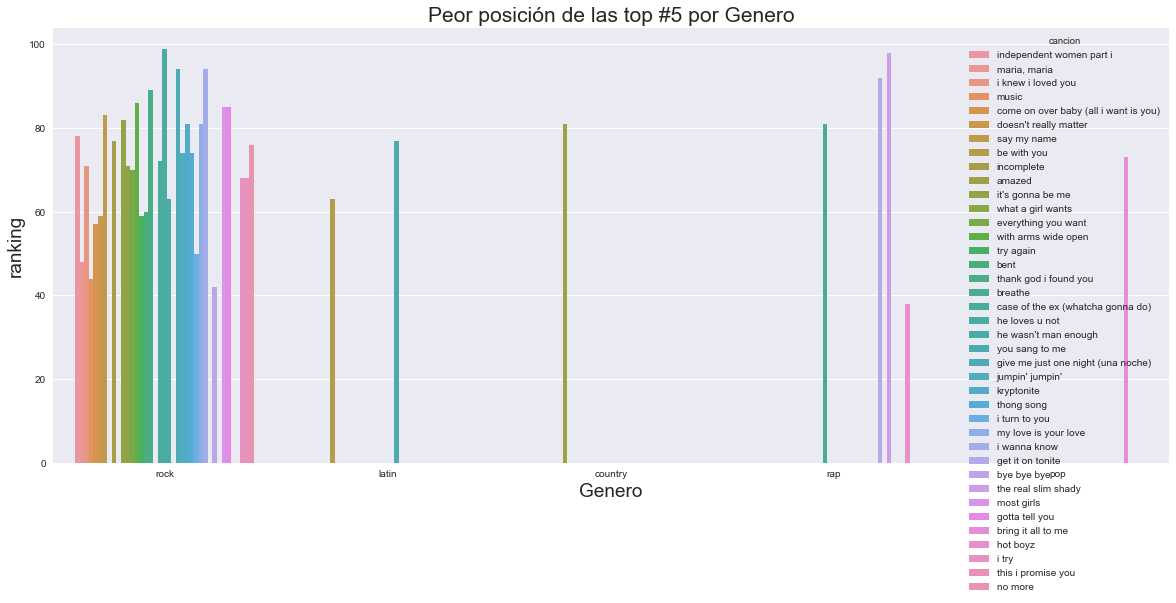

In [17]:
# Establecemos el tamaño de la figura

plt.figure(figsize=(20,8))

# Inicializamos el gráfico
plot = sns.barplot(x = 'genero', y = 'peor_pos', hue = 'cancion',  data = good_top5, ci=None);

# Agregamos el título.
plot.set_title('Peor posición de las top #5 por Genero', fontdict = {'fontsize': 21, 'verticalalignment':'baseline'} )

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Genero',      fontdict = {'fontsize':19})
plot.set_ylabel('ranking', fontdict = {'fontsize':19})

# Mostramos el gráfico
plt.show()

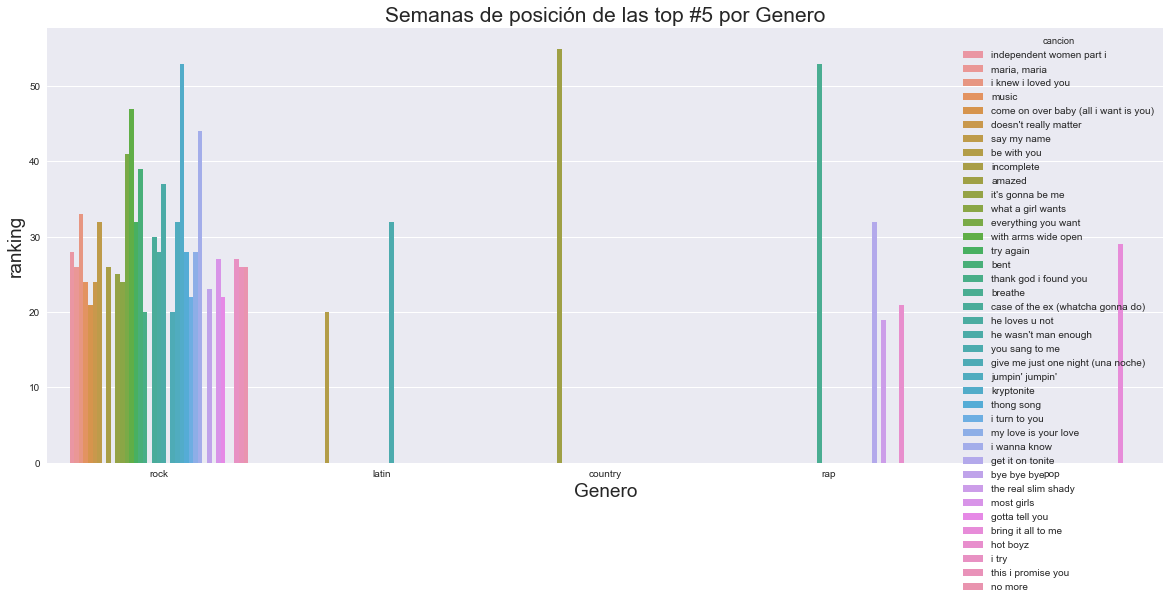

In [18]:
# Establecemos el tamaño de la figura

plt.figure(figsize=(20,8))

# Inicializamos el gráfico
plot = sns.barplot(x = 'genero', y = 'sem_pos', hue = 'cancion',  data = good_top5, ci=None);

# Agregamos el título.
plot.set_title('Semanas de posición de las top #5 por Genero', fontdict = {'fontsize': 21, 'verticalalignment':'baseline'} )

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Genero',      fontdict = {'fontsize':19})
plot.set_ylabel('ranking', fontdict = {'fontsize':19})

# Mostramos el gráfico
plt.show()

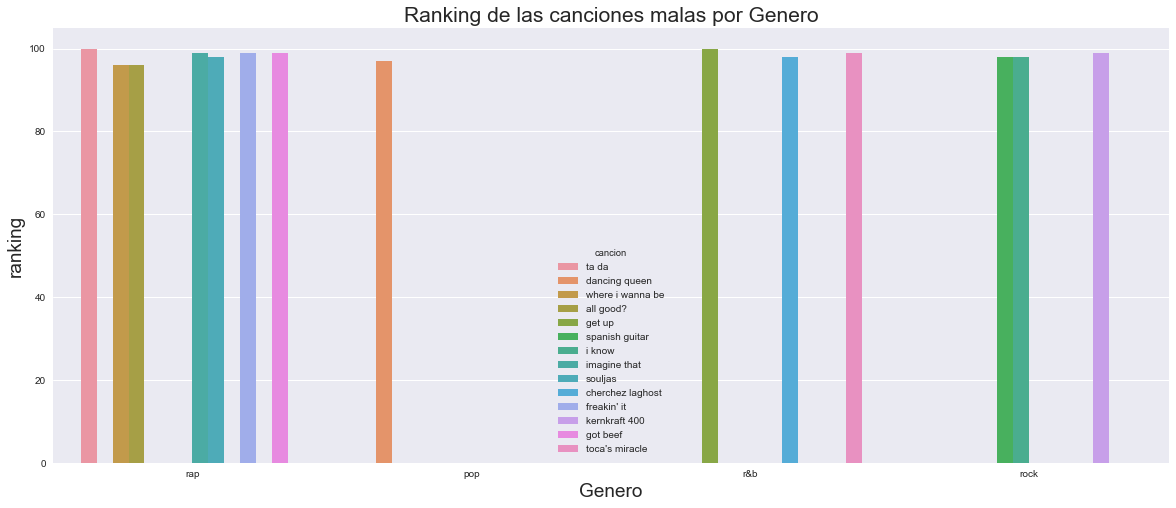

In [19]:
# Establecemos el tamaño de la figura
plt.figure(figsize=(20,8))

# Inicializamos el gráfico
plot = sns.barplot(x = 'genero', y = 'ranking', hue = 'cancion',  data = bad_top5, ci=None);

# Agregamos el título.
plot.set_title('Ranking de las canciones malas por Genero', fontdict = {'fontsize': 21, 'verticalalignment':'baseline'} )


# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Genero',      fontdict = {'fontsize':19})
plot.set_ylabel('ranking', fontdict = {'fontsize':19})

# Mostramos el gráfico
plt.show()

In [20]:
bad_top5

cancion  nombre_artistico tiempo genero fecha_entrada  \
0              ta da           lil' mo   4:17    rap    2000-08-12   
1      dancing queen           a*teens   3:44    pop    2000-07-08   
2   where i wanna be      shade sheist   4:16    rap    2000-11-11   
3          all good?        de la soul   5:02    rap    2000-12-23   
4             get up     amel larrieux   4:02    r&b    2000-03-04   
5     spanish guitar      toni braxton   4:24   rock    2000-12-02   
6             i know           tuesday   4:06   rock    2000-12-30   
7       imagine that         ll cool j   4:00    rap    2000-08-12   
8            souljas          master p   3:33    rap    2000-11-18   
9   cherchez laghost  ghostface killah   3:04    r&b    2000-08-05   
10       freakin' it        will smith   3:58    rap    2000-02-12   
11     kernkraft 400     zombie nation   3:30   rock    2000-09-02   
12          got beef     the eastsidaz   3:58    rap    2000-07-01   
13    toca's miracle            fragma   3:22    r&b    2000-10-28   

   fecha_punto_maximo  ranking  num_semana  mejor_pos  peor_pos  permanencia  \
0          2000-09-16      100           1         95       100            7   
1          2000-07-29       97           1         95       100            5   
2          2000-11-18       96           1         95       100            5   
3          2000-12-23       96           1         96       100            3   
4          2000-03-11      100           1         97       100            3   
5          2000-12-02       98           1         98        98            3   
6          2000-12-30       98           1         98        98            2   
7          2000-08-19       99           1         98        99            2   
8          2000-11-18       98           1         98        98            1   
9          2000-08-05       98           1         98        98            1   
10         2000-02-12       99           1         99        99            4   
11         2000-09-02       99           1         99        99            2   
12         2000-07-01       99           1         99        99            2   
13         2000-10-28       99           1         99        99            1   

    sem_pos  time  
0         7  4.17  
1         5  3.44  
2         5  4.16  
3         3  5.02  
4         3  4.02  
5         3  4.24  
6         2  4.06  
7         2  4.00  
8         1  3.33  
9         1  3.04  
10        4  3.58  
11        2  3.30  
12        2  3.58  
13        1  3.22

Se analizará tanto la semanas con posición como la mejor posición y la peor posición **según tiempo**.

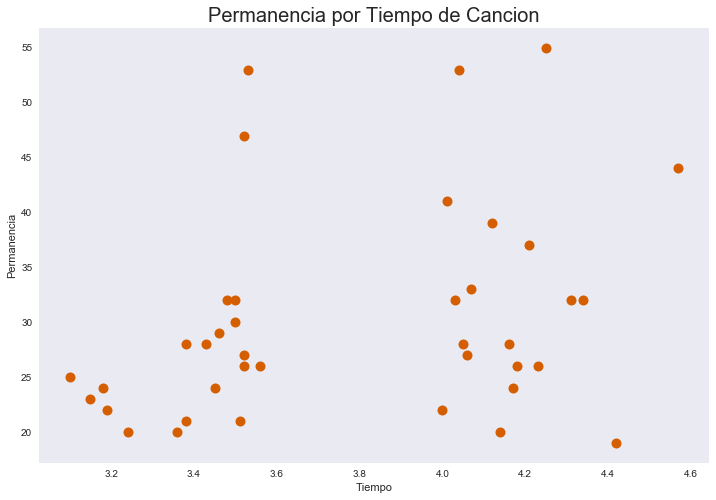

In [23]:
# Establecemos tamaño de la figura
plt.figure(figsize = (12, 8))
plt.grid()

# Aumentamos el tamaño de los puntos
plt.plot(good_top5['time'], good_top5['sem_pos'], 'or', markersize=10)

# Nombre eje x
plt.xlabel("Tiempo")

# Nombre eje y
plt.ylabel("Permanencia")

# Título del gráfico
plt.title("Permanencia por Tiempo de Cancion", fontsize=20);

Text(0.5,1,'Permanencia por Tiempo de Cancion')

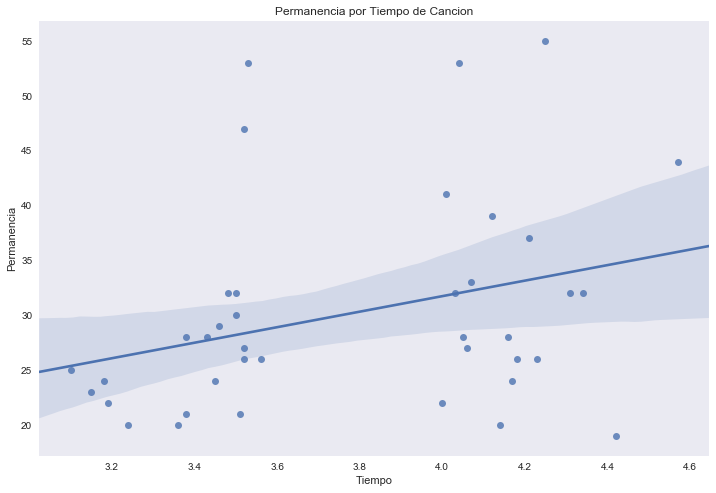

In [25]:
plt.figure(figsize = (12, 8))
plt.grid()
sns.regplot(x=good_top5['time'], y=good_top5['sem_pos'], marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Permanencia')
plt.title('Permanencia por Tiempo de Cancion')

Text(0.5,1,'Permanencia por Tiempo de Cancion')

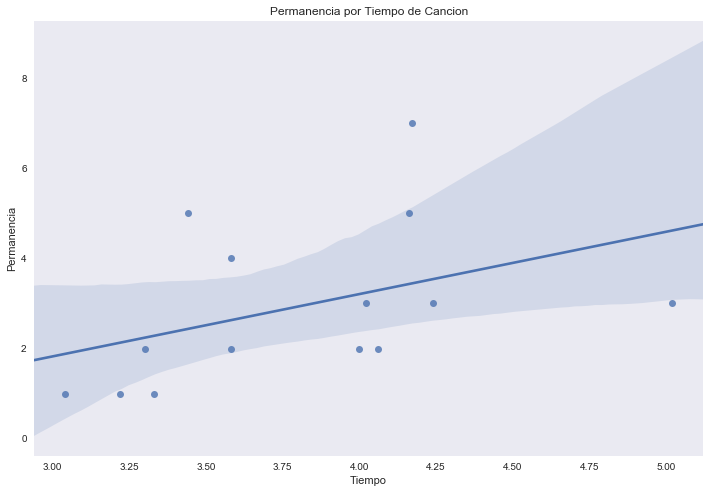

In [26]:
plt.figure(figsize = (12, 8))
plt.grid()
sns.regplot(x=bad_top5['time'], y=bad_top5['sem_pos'], marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Permanencia')
plt.title('Permanencia por Tiempo de Cancion')

Las gráficas de regresión lineal entre tiempo y permanencia intentan reflejar que a mayor tiempo de duración de canción debería haber mayor permanencia en el ranking aunque esto no es así. Entonces suponemos que un modelo de minimo cuadrados ordinarios no explicaría de manera correcta la relación de estas 2 variables, prueba de esto es la gran dipersión que se muestra en la gráfica....